# enerGyPU for Data Visualization
Monitoring Performance and Power Consumption on Multi-GPUs
* enerGyPU_display.ipynb contains predefined code functions written in Python for analysis architectural factors that determine the energy efficiency on multi-GPU.

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Setting application host-directory that want to analyse

In [2]:
### Setting application host-directory that want to analyse

# Select the directory where is the experiments
tesbet='../testbed'

# Enter the application name
app_name='matrixMul'

# Enter the node name
node_name='turing'

# Enter the Global workload parameters used in enerGyPU_record.sh (ARGV=$DIM-$nGPU-$DATA)
exp_id='8192-1-201610061352'

# Directory of the experiment Runtime
Dir=tesbet+'/'+node_name+'-'+app_name+'-'+exp_id+'/'+node_name+'-'+app_name+'-'+exp_id+'-'
print Dir

# Enter the name of devices files data captured with enerGyPU
#devices_name=['gpu00','gpu01','gpu02','gpu03', 'gpu04','gpu05','gpu06','gpu07']
devices_name=['gpu00']

../testbed/turing-matrixMul-8192-1-201610061352/turing-matrixMul-8192-1-201610061352-


### Def-01: enerGyPU-SequencePlot Displays the Behavior of EEA Control Factors

In [3]:
### Def-01: enerGyPU-SequencePlot Displays the Behavior of EEA Control Factors

# enerGyPU-SequencePlot is a graph that displays the behavior of factors influencing energy efficiency of GPU 
# in runtime the Linpack Benchmark

def sequenceGPU(data_gpu,gpu):
    
    #enerGyPU-Sequenceplot to analyzes of power consumption for each GPU  
    fig0, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(26,4),sharex=True)
    ax0.plot(data_gpu[:,1],data_gpu[:,3],'gray',marker="*")
    ax0.set_title(gpu+'|SM Frequency')
    ax0.set_xlabel('Time')
    ax0.set_ylabel('SM (MHz)')
    ax0.set_ylim(0,1400)
    ax1.plot(data_gpu[:,1],data_gpu[:,4],'gray',marker="*")
    ax1.set_title(gpu+'|Memory Frequency')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Memory (MHz)')
    ax1.set_ylim(0,3505)   
    ax2.plot(data_gpu[:,1],data_gpu[:,5],'gray',marker="*")
    ax2.set_title(gpu+'|Memory Size')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Used (MiB)')
    ax2.set_ylim(0,12000)
    ax3.plot(data_gpu[:,1],data_gpu[:,7],'gray',marker="*")
    ax3.set_title(gpu+'|Power Consumption')
    ax3.set_xlabel('Time')  
    ax3.set_ylabel('Consumo (Watts)')
    ax3.set_ylim(0,250)

### Main: enerGyPU_display

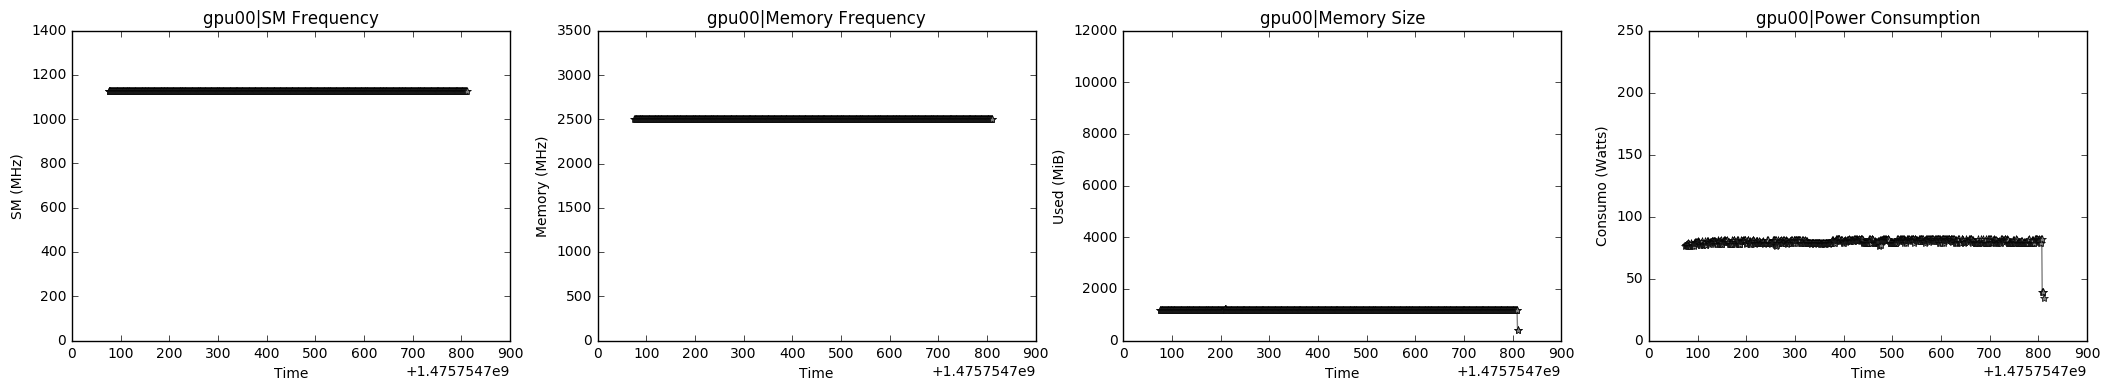

In [4]:
for i in devices_name:
    data_gpu=pd.read_csv(Dir+str(i+'.csv'), header=0, sep=";").as_matrix()
    sequenceGPU(data_gpu,i)